In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X =iris.data
# y取值 0,1,2
y = iris.target

In [4]:
# 选择y为0,1的数据，排除y为2的数据，方便逻辑回归进行二分类
# 同时为了方便可视化，只取前两个特征
X = X[y < 2, :2]
y = y[y < 2]

In [5]:
X.shape

(100, 2)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

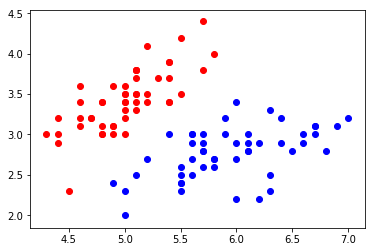

In [7]:
plt.scatter(X[y==0, 0], X[y==0,1], color='r')
plt.scatter(X[y==1, 0], X[y==1,1], color='b')
plt.show()

### 使用逻辑回归

In [8]:
import os, sys
cur_path = os.path.abspath(os.path.dirname('__file__'))
basic_path = cur_path.replace('logisticRegression', 'basic')
sys.path.append(basic_path)

In [9]:
from LogisticRegression import LogisticRegression
from model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)


In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
log_reg.score(X_test, y_test)

1.0

In [13]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [14]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

### 决策边界
$$\theta^T \cdot x_b = 0$$

### 如果有两个特征

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $$

$$x_2 = \frac{-\theta_0-\theta_1 x_1}{\theta_2}$$

In [15]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_)/ log_reg.coef_[1]

In [16]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

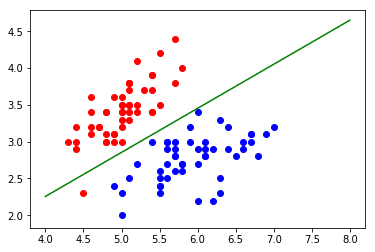

In [17]:
plt.plot(x1_plot, x2_plot, color='g')
plt.scatter(X[y==0, 0], X[y==0,1], color='r')
plt.scatter(X[y==1, 0], X[y==1,1], color='b')
plt.show()